<a href="https://colab.research.google.com/github/kunalbathija/Udemy-TF-2.0/blob/master/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
N=1000
X = np.random.random((N,2)) * 6 -3  #uniformly distributed btw (-3, 3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1]) # 2cosx1+3cosx2
print(X[:,0][0], X[:,0][1])
print(X)

-0.95609343496705 -0.9058909847387033
[[-0.95609343 -1.37975483]
 [-0.90589098 -2.24795888]
 [ 2.26376457 -2.96620145]
 ...
 [ 0.49499356  1.54709696]
 [ 2.11603298 -1.36025549]
 [-1.17269897  0.5992285 ]]


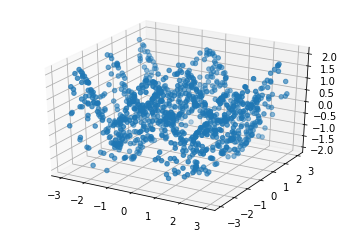

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [19]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9591
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8503
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8495
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8209
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7939
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7710
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7031
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6311
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5880
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5796
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5839
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5112
Epoch 13/100
32/32 [=================

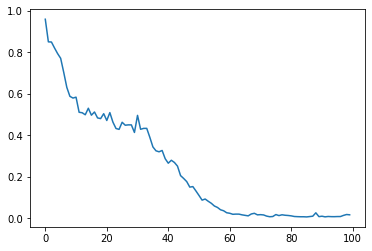

In [20]:
plt.plot(r.history['loss'], label='loss')

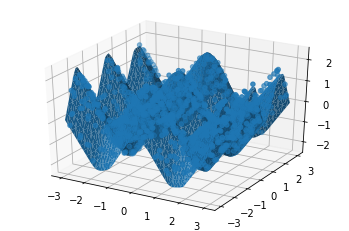

In [21]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

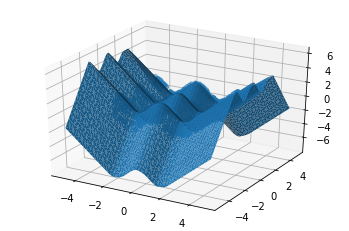

In [22]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()